In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [4]:
# ==========================================
# 1. Import the dataset
# ==========================================
# Change 'heart.csv' to the actual path of your local file
try:
    df = pd.read_csv(r"F:\11 semester Artificial intelligence nural network\11 lab trial 1 final\7. alzheimers_disease_data.csv")
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'heart.csv' not found. Please ensure the file is in the project folder.")

Dataset loaded successfully.


In [6]:
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [5]:
# Dropping PatientID as it's just an identifier, not a feature
if 'PatientID' in df.columns:
    df = df.drop('PatientID', axis=1)

print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (2149, 34)


C:\Users\islam\AppData\Local\Temp\ipykernel_9308\2504932022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=df, palette='viridis')


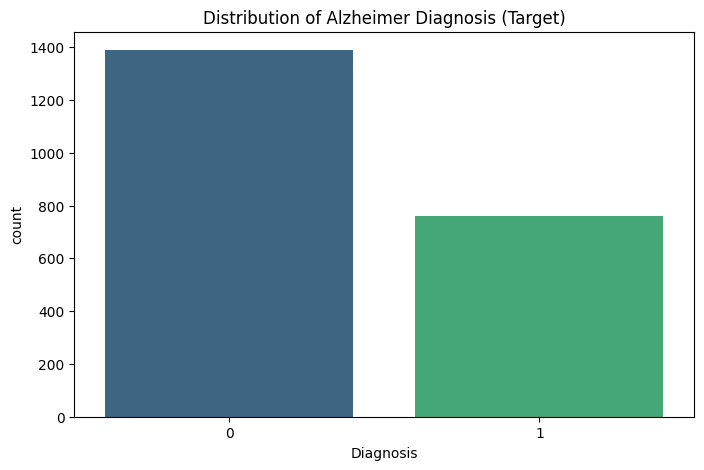

In [7]:
# ==========================================
# 2. Dataset visualization
# ==========================================
plt.figure(figsize=(8, 5))
sns.countplot(x='Diagnosis', data=df, palette='viridis')
plt.title('Distribution of Alzheimer Diagnosis (Target)')
plt.show()

In [9]:
# ==========================================
# 3. Data Preprocessing
# ==========================================

# i. Handling Missing values
df = df.fillna(df.median(numeric_only=True))

In [10]:
# iii. Encoding Categorical data (If any)
# The dataset has 'Gender', 'Ethnicity', etc., but they are already numerically encoded.
# If you had text data, we would use LabelEncoder here.

# Separate Features and Target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

In [12]:
# ii. Normalization: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_cols = X.columns # Keep column names for feature importance

# iv. Handling Imbalanced data (show in figure)
print("Original class distribution:", np.bincount(y))

# Visualizing before SMOTE
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Before SMOTE (Imbalanced)')
plt.show()

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

print("Resampled class distribution:", np.bincount(y_res))

# v. Finding feature importance (using Random Forest)
rf_feat = RandomForestClassifier(random_state=42)
rf_feat.fit(X_res, y_res)
importances = rf_feat.feature_importances_
indices = np.argsort(importances)[-10:] # Top 10 features

# vi. Show necessary figure about feature importance
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X_cols[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

ValueError: could not convert string to float: 'XXXConfid'